In [1]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
BERT = "bert-base-uncased"

In [3]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained(BERT)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [4]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [5]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [6]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS]" + text + "[SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


In [104]:
type(tokenized_text)

list

In [7]:
marked_text

'[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. [SEP]'

In [8]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [10]:
tokens_tensor

tensor([[  101,  2044, 11065,  2769,  2013,  1996,  2924, 11632,  1010,  1996,
          2924, 27307,  2001,  2464,  5645,  2006,  1996,  5900,  2314,  2924,
          1012,   102]])

In [11]:
text

'After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank.'

In [13]:
tmp = text.split(" ")
len(tmp)

18

In [14]:
segments_tensors

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [15]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained(BERT,
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [16]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [105]:
type(hidden_states)

tuple

In [17]:
for i in outputs:
    print(i)

last_hidden_state
pooler_output
hidden_states


In [52]:
hidden_states = outputs[2]

In [19]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


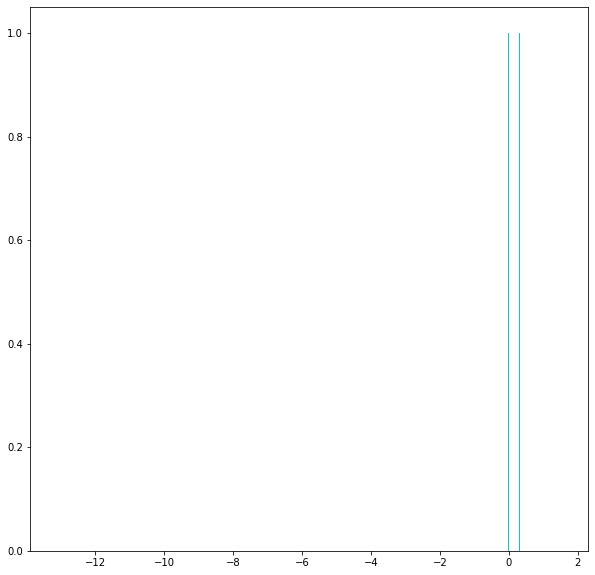

In [21]:
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [22]:
# `hidden_states` is a Python list.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 22, 768])


In [31]:
len(hidden_states)
# 13 x 1 x 22 x 768 -->13個layers 一個layer 1x22x768

13

In [32]:
hidden_states[-2][0]

tensor([[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
        [ 0.2329,  0.1390,  0.2979,  ..., -0.0655,  0.8885,  0.5109],
        [ 0.2257, -0.7165, -0.7255,  ...,  0.4844,  0.6030, -0.0957],
        ...,
        [-0.0374, -0.6155, -1.4419,  ...,  0.0793, -0.0811, -0.3802],
        [-0.0228,  0.4207, -0.3288,  ...,  0.4464,  0.5178,  0.5501],
        [-0.2350,  0.1566, -0.0462,  ..., -0.4206,  0.3074, -0.2288]])

In [53]:
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 22, 768])

In [35]:
token_embeddings

tensor([[[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
            3.8253e-02,  1.6400e-01],
          [ 2.3295e-01,  1.3898e-01,  2.9788e-01,  ..., -6.5464e-02,
            8.8849e-01,  5.1089e-01],
          [ 2.2572e-01, -7.1647e-01, -7.2547e-01,  ...,  4.8439e-01,
            6.0302e-01, -9.5701e-02],
          ...,
          [-3.7402e-02, -6.1545e-01, -1.4419e+00,  ...,  7.9256e-02,
           -8.1097e-02, -3.8018e-01],
          [-2.2755e-02,  4.2067e-01, -3.2878e-01,  ...,  4.4641e-01,
            5.1775e-01,  5.5010e-01],
          [-2.3496e-01,  1.5656e-01, -4.6245e-02,  ..., -4.2065e-01,
            3.0737e-01, -2.2883e-01]]],


        [[[ 5.2195e-02,  5.9528e-02, -2.1788e-01,  ...,  2.2799e-01,
           -7.1235e-02,  1.4849e-02],
          [ 3.8188e-01,  1.4754e-01,  2.4141e-01,  ...,  3.3967e-01,
            7.6073e-01,  4.9991e-01],
          [ 1.7047e-01, -6.1683e-01, -7.2964e-01,  ...,  8.6309e-01,
            6.2739e-01, -3.7271e-01],
          ...,
   

In [54]:
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 22, 768])

In [37]:
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([22, 13, 768])

In [38]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 22 x 768


In [ ]:
# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

In [57]:
token_embeddings.size()
#torch.Size([13, 22, 768])

torch.Size([13, 22, 768])

In [58]:
token_embeddings = token_embeddings[2:]

In [59]:
token_embeddings.size()

torch.Size([11, 22, 768])

In [61]:
len(torch.mean(token_embeddings[0], dim=0))

768

In [81]:
tmp_sentence_embbedding_list = torch.tensor([])


In [84]:
tmp_sentence_embbedding_list

tensor([])

In [88]:
a =[]
for i in token_embeddings:
    a.append(torch.mean(i, dim=0))


[tensor([ 7.2884e-02,  3.6702e-04, -4.3007e-01,  1.6067e-01,  3.9905e-01,
          2.0484e-01, -7.5041e-02,  1.4112e-01,  2.9739e-02, -1.5130e-01,
          1.1614e-02,  1.8769e-01, -5.1969e-01, -1.2668e-01, -2.8035e-01,
          6.2874e-02,  7.0332e-02,  1.3118e-01, -1.4409e-01,  1.7518e-01,
         -9.3398e-03,  4.4443e-02,  3.0185e-01, -1.3109e-01,  4.8012e-01,
          1.1327e-01, -1.0854e-01,  2.5537e-01, -3.3888e-01,  3.5610e-01,
          2.7167e-01,  2.8288e-01,  3.3371e-01, -1.6758e-01,  1.5662e-01,
          1.0939e-01, -1.1187e-01, -3.1922e-01, -2.5830e-01,  3.0808e-01,
          3.7500e-02, -4.7861e-01,  2.7155e-03, -8.6677e-02, -1.9349e-01,
          6.8254e-02,  8.9043e-02, -2.2147e-01, -4.3551e-02,  7.2756e-02,
         -3.9560e-01,  3.8912e-01, -1.1284e-01, -7.5871e-02, -4.5415e-02,
         -5.8335e-02, -2.4932e-01, -2.0290e-01, -9.2025e-02, -2.2188e-01,
         -2.8451e-01, -5.7860e-02,  1.3203e-01, -8.2570e-02, -1.5929e-01,
         -2.1656e-02, -3.4899e-01,  4.

In [91]:
b =torch.Tensor([])
for i in token_embeddings:
    torch.cat((b,torch.mean(i, dim=0)),0)


In [95]:
a = torch.stack(a, dim=0)

a.size()

torch.Size([11, 768])

In [100]:
torch.mean(a,dim=0)

tensor([ 4.2286e-02, -2.5398e-01, -3.2335e-01,  7.5147e-02,  6.7853e-01,
         6.1558e-02,  1.3156e-01,  1.1018e-01, -4.4794e-02, -1.4555e-01,
         9.6283e-02,  4.7999e-02, -3.0452e-01,  9.6764e-02, -3.9782e-01,
         1.2488e-01,  3.9275e-03,  2.9712e-01,  1.2032e-01,  2.0439e-01,
        -1.3577e-01, -1.7437e-01,  1.0048e-01,  6.3716e-02,  2.4925e-01,
         5.2208e-02, -3.6763e-02,  2.4246e-01, -3.2561e-01,  2.0172e-01,
         2.9833e-01,  2.4684e-01,  5.1920e-01, -3.2006e-01, -1.9169e-02,
        -3.9029e-02, -2.3328e-01, -1.9951e-01, -2.4723e-01,  2.4914e-01,
        -4.2308e-02, -3.5495e-01,  3.2889e-02,  2.3818e-01,  9.8306e-02,
         1.0492e-01, -6.6076e-02, -4.3336e-01,  6.2095e-02, -2.0550e-01,
        -3.9071e-01,  3.9376e-01, -4.6006e-01, -3.4852e-01,  5.7653e-02,
         2.5314e-01, -1.5006e-01, -4.2316e-01,  2.4885e-01, -2.0413e-01,
        -1.0396e-01,  4.5236e-02,  2.7234e-01, -2.7180e-01, -3.3156e-01,
        -1.0887e-01, -4.1469e-02,  1.9498e-01, -9.4

In [103]:
from scipy.spatial.distance import cosine

In [107]:
1-cosine(torch.mean(a,dim=0), torch.mean(a,dim=0))

1

In [110]:
E = [torch.mean(a,dim=0),torch.mean(a,dim=0)]

In [113]:
a,b = E
1-cosine(a,b)

1